### Autoregressão vetorial

In [8]:
library(forecast)
library(zoo)
library(data.table)
library(vars)

Modelos Var são usados com mais frequencia na econometria. Não raro, eles sofrem criticasm, **pois não tem nenhuma estrutura além da hipotese de que todos os valores influenciam uns ao outros.**

No entanto, VAR ainda tem sua serventia - por exemplo testa se uma variavel causa outra variavel.

In [3]:
demand = fread('dataset\\Daily_Demand_Forecasting_Orders.csv')
head(demand, 2)

V1,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675


In [11]:
VARselect(demand[, 11:12], lag.max = 3, type = 'const')

,1,2,3
AIC(n),4.186910e+01,4.198381e+01,4.188435e+01
HQ(n),4.195268e+01,4.212311e+01,4.207937e+01
SC(n),4.208416e+01,4.234224e+01,4.238615e+01
FPE(n),1.526179e+18,1.712890e+18,1.553189e+18


In [12]:
est.var = VAR(demand[,11:12, with=FALSE], p=3, type='const')
summary(est.var)


VAR Estimation Results:
Endogenous variables: Banking.orders..1., Banking.orders..2. 
Deterministic variables: const 
Sample size: 57 
Log Likelihood: -1341.463 
Roots of the characteristic polynomial:
0.8582 0.7053 0.684 0.684 0.6003 0.6003
Call:
VAR(y = demand[, 11:12, with = FALSE], p = 3, type = "const")


Estimation results for equation Banking.orders..1.: 
Banking.orders..1. = Banking.orders..1..l1 + Banking.orders..2..l1 + Banking.orders..1..l2 + Banking.orders..2..l2 + Banking.orders..1..l3 + Banking.orders..2..l3 + const 

                        Estimate Std. Error t value Pr(>|t|)    
Banking.orders..1..l1  8.415e-01  1.409e-01   5.973 2.41e-07 ***
Banking.orders..2..l1 -1.636e-01  1.181e-01  -1.385   0.1722    
Banking.orders..1..l2 -2.882e-01  1.814e-01  -1.589   0.1183    
Banking.orders..2..l2  1.616e-02  1.213e-01   0.133   0.8946    
Banking.orders..1..l3  2.714e-01  1.452e-01   1.869   0.0675 .  
Banking.orders..2..l3  2.404e-02  1.119e-01   0.215   0.8308    
const 

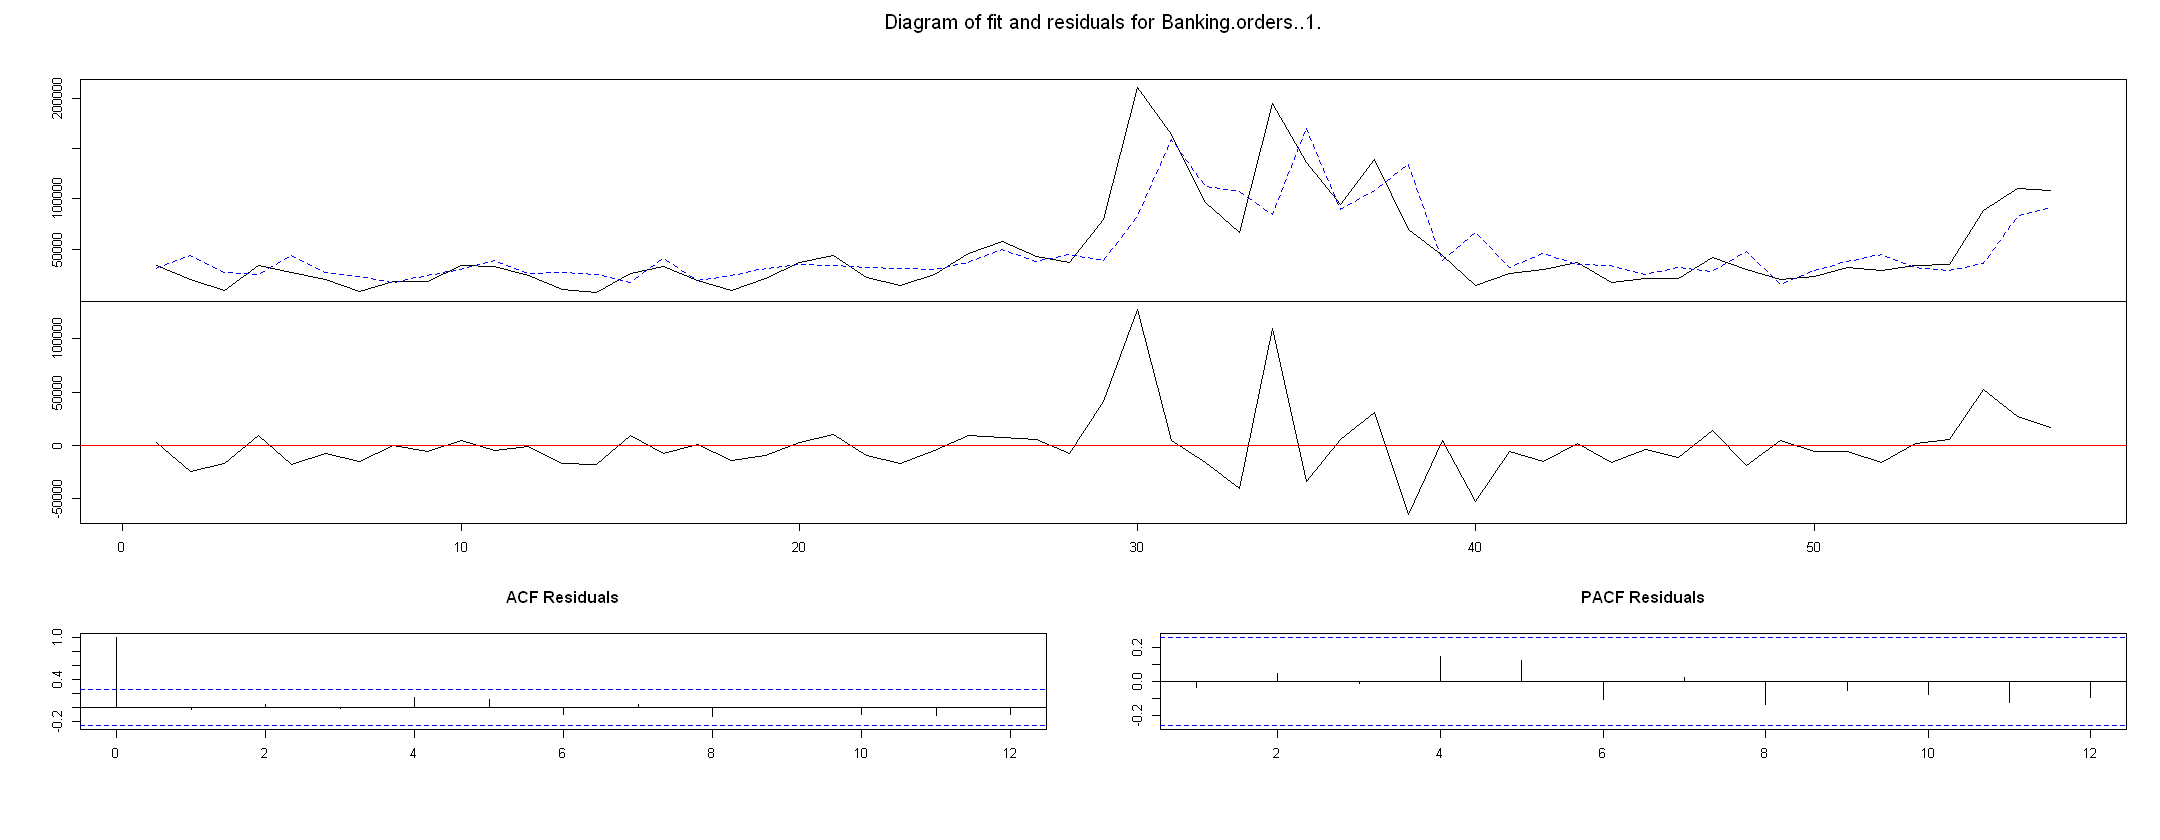

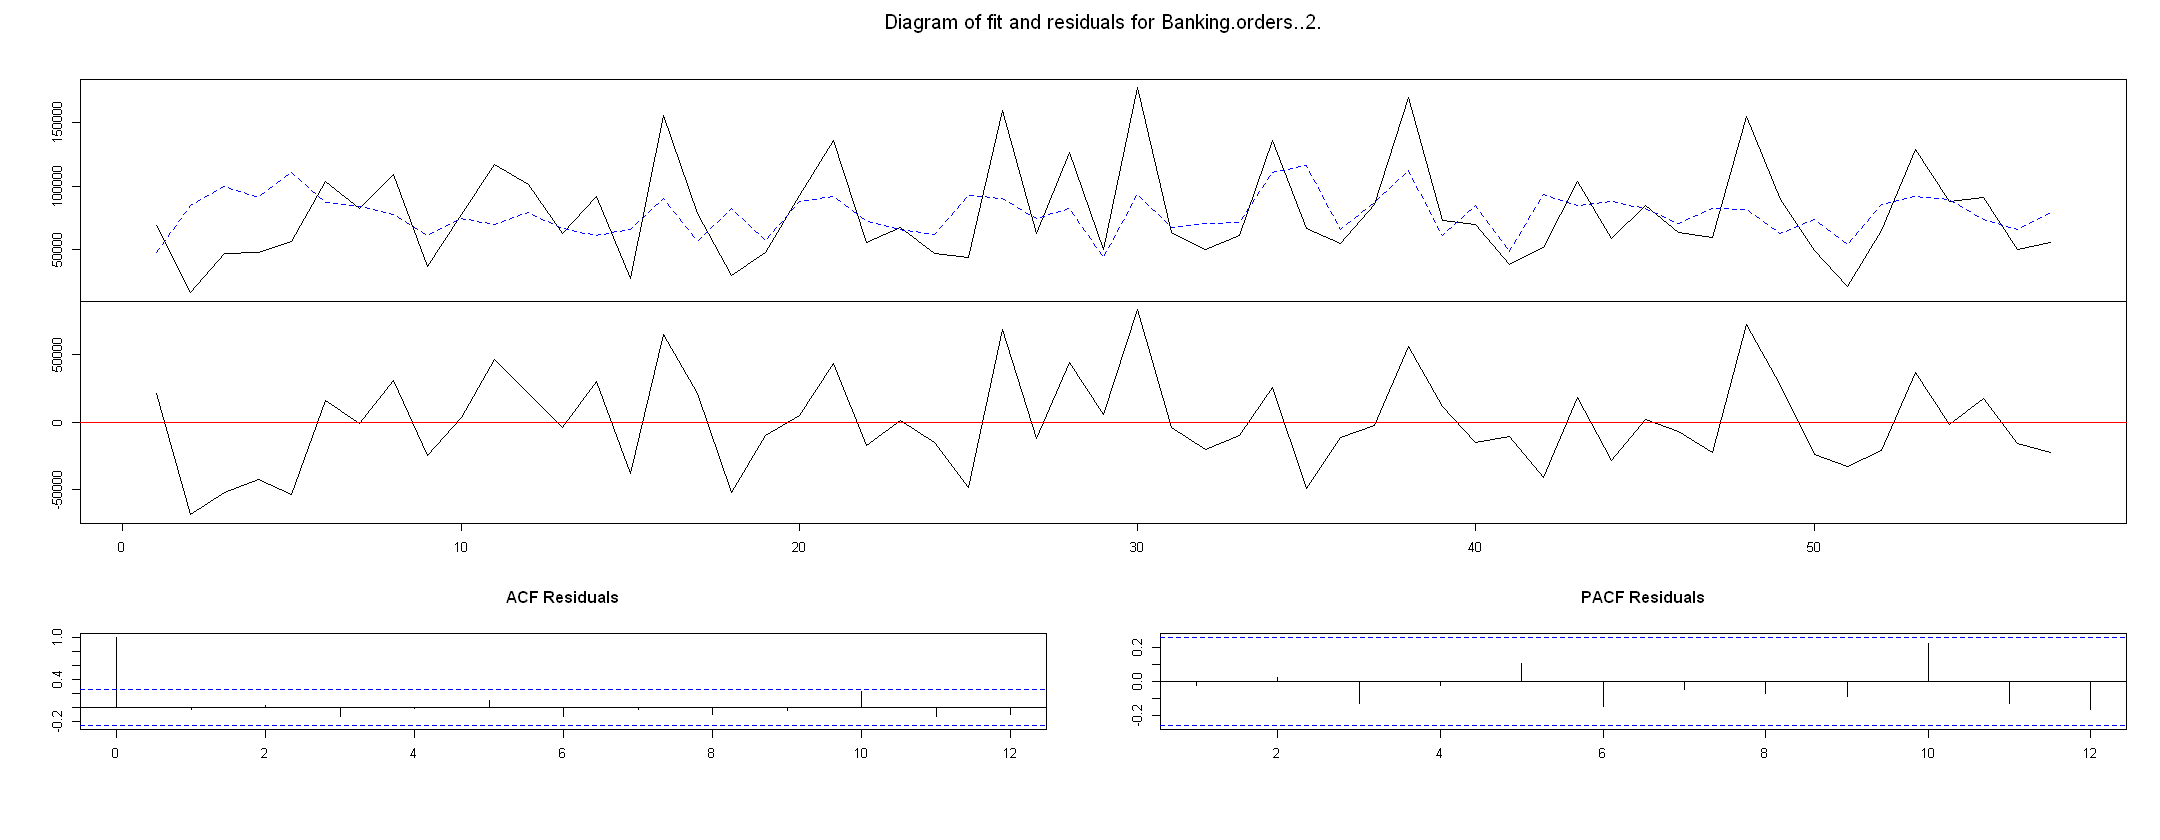

In [16]:
par(mfrow=c(1,2), bg = 'white')
options(repr.plot.width=18)
plot(est.var)
